## Mouse Connectivity

This notebook demonstrates how to access and manipulate data in the Allen Mouse Brain Connectivity Atlas. The `MouseConnectivityCache` AllenSDK class provides methods for downloading metadata about experiments, including their viral injection site and the mouse's transgenic line. You can request information either as a Pandas DataFrame or a simple list of dictionaries.

An important feature of the `MouseConnectivityCache` is how it stores and retrieves data for you. By default, it will create (or read) a manifest file that keeps track of where various connectivity atlas data are stored. If you request something that has not already been downloaded, it will download it and store it in a well known location.

Download this notebook in .ipynb format <a href='mouse_connectivity.ipynb'>here</a>.

In [1]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache

# The manifest file is a simple JSON file that keeps track of all of
# the data that has already been downloaded onto the hard drives.
# If you supply a relative path, it is assumed to be relative to your
# current working directory.
mcc = MouseConnectivityCache()

# open up a list of all of the experiments
all_experiments = mcc.get_experiments(dataframe=True)
print("%d total experiments" % len(all_experiments))

# take a look at what we know about an experiment with a primary motor injection
all_experiments.loc[122642490]

2995 total experiments


gender                                            M
id                                        122642490
injection_structures                     [985, 993]
injection_volume                           0.151071
injection_x                                    4300
injection_y                                    2690
injection_z                                    7050
primary_injection_structure                     985
product_id                                        5
specimen_name                          Syt6-Cre-585
strain                                     C57BL/6J
structure_abbrev                                MOs
structure_id                                    993
structure_name                 Secondary motor area
transgenic_line                      Syt6-Cre_KI148
transgenic_line_id                      1.77839e+08
Name: 122642490, dtype: object

`MouseConnectivityCache` has a method for retrieving the adult mouse structure tree as an `StructureTree` class instance. This is a wrapper around a list of dictionaries, where each dictionary describes a structure. It is principally useful for looking up structures by their properties.

In [2]:
# pandas for nice tables
import pandas as pd

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

# get info on some structures
structures = structure_tree.get_structures_by_name(['Primary visual area', 'Hypothalamus'])
pd.DataFrame(structures)

,acronym,graph_id,graph_order,id,name,rgb_triplet,structure_id_path,structure_set_ids
0,VISp,1,185,385,Primary visual area,"[8, 133, 140]","[997, 8, 567, 688, 695, 315, 669, 385]","[396673091, 112905828, 688152357, 691663206, 6..."
1,HY,1,715,1097,Hypothalamus,"[230, 68, 56]","[997, 8, 343, 1129, 1097]","[2, 112905828, 691663206, 12, 184527634, 11290..."


As a convenience, structures are grouped in to named collections called "structure sets". These sets can be used to quickly gather a useful subset of structures from the tree. The criteria used to define structure sets are eclectic; a structure set might list:

* structures that were used in a particular project.
* structures that coarsely partition the brain.
* structures that bear functional similarity.

or something else entirely. To view all of the available structure sets along with their descriptions, follow this [link](http://api.brain-map.org/api/v2/data/StructureSet/query.json). To see only structure sets relevant to the adult mouse brain, use the StructureTree:

In [3]:
from allensdk.api.queries.ontologies_api import OntologiesApi

oapi = OntologiesApi()

# get the ids of all the structure sets in the tree
structure_set_ids = structure_tree.get_structure_sets()

# query the API for information on those structure sets
pd.DataFrame(oapi.get_structure_sets(structure_set_ids))

,description,id,name
0,List of structures in Isocortex layer 5,667481446,Isocortex layer 5
1,List of structures in Isocortex layer 6b,667481450,Isocortex layer 6b
2,Summary structures of the cerebellum,688152368,Cerebellum
3,List of structures for ABA Differential Search,12,ABA - Differential Search
4,List of valid structures for projection target...,184527634,Mouse Connectivity - Target Search
5,Structures whose surfaces are represented by a...,691663206,Mouse Brain - Has Surface Mesh
6,Summary structures of the midbrain,688152365,Midbrain
7,Summary structures of the medulla,688152367,Medulla
8,Summary structures of the striatum,688152361,Striatum
9,Structures representing subdivisions of the mo...,687527945,Mouse Connectivity - Summary


On the connectivity atlas web site, you'll see that we show most of our data at a fairly coarse structure level. We did this by creating a structure set of ~300 structures, which we call the "summary structures". We can use the structure tree to get all of the structures in this set:

In [4]:
# From the above table, "Mouse Connectivity - Summary" has id 167587189
summary_structures = structure_tree.get_structures_by_set_id([167587189])
pd.DataFrame(summary_structures)

,acronym,graph_id,graph_order,id,name,rgb_triplet,structure_id_path,structure_set_ids
0,FRP,1,6,184,"Frontal pole, cerebral cortex","[38, 143, 69]","[997, 8, 567, 688, 695, 315, 184]","[3, 112905828, 688152357, 691663206, 687527945..."
1,MOp,1,18,985,Primary motor area,"[31, 157, 90]","[997, 8, 567, 688, 695, 315, 500, 985]","[112905828, 688152357, 691663206, 687527945, 1..."
2,MOs,1,24,993,Secondary motor area,"[31, 157, 90]","[997, 8, 567, 688, 695, 315, 500, 993]","[112905828, 688152357, 691663206, 687527945, 1..."
3,SSp-n,1,44,353,"Primary somatosensory area, nose","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 353]","[112905828, 688152357, 691663206, 687527945, 1..."
4,SSp-bfd,1,51,329,"Primary somatosensory area, barrel field","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 329]","[112905828, 688152357, 691663206, 687527945, 1..."
5,SSp-ll,1,65,337,"Primary somatosensory area, lower limb","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 337]","[112905828, 688152357, 691663206, 687527945, 1..."
6,SSp-m,1,72,345,"Primary somatosensory area, mouth","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 345]","[112905828, 688152357, 691663206, 687527945, 1..."
7,SSp-ul,1,79,369,"Primary somatosensory area, upper limb","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 369]","[112905828, 688152357, 691663206, 687527945, 1..."
8,SSp-tr,1,86,361,"Primary somatosensory area, trunk","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 361]","[112905828, 688152357, 691663206, 687527945, 1..."
9,SSp-un,1,93,182305689,"Primary somatosensory area, unassigned","[24, 128, 100]","[997, 8, 567, 688, 695, 315, 453, 322, 182305689]","[112905828, 688152357, 691663206, 687527945, 1..."


This is how you can filter experiments by transgenic line:

In [5]:
# fetch the experiments that have injections in the isocortex of cre-positive mice
isocortex = structure_tree.get_structures_by_name(['Isocortex'])[0]
cre_cortical_experiments = mcc.get_experiments(cre=True, 
                                                injection_structure_ids=[isocortex['id']])

print("%d cre cortical experiments" % len(cre_cortical_experiments))

# same as before, but restrict the cre line
rbp4_cortical_experiments = mcc.get_experiments(cre=[ 'Rbp4-Cre_KL100' ], 
                                                injection_structure_ids=[isocortex['id']])


print("%d Rbp4 cortical experiments" % len(rbp4_cortical_experiments))

1211 cre cortical experiments
105 Rbp4 cortical experiments


## Structure Signal Unionization

The ProjectionStructureUnionizes API data tells you how much signal there was in a given structure and experiment. It contains the density of projecting signal, volume of projecting signal, and other information. `MouseConnectivityCache` provides methods for querying and storing this data.

In [6]:
# find wild-type injections into primary visual area
visp = structure_tree.get_structures_by_acronym(['VISp'])[0]
visp_experiments = mcc.get_experiments(cre=False, 
                                       injection_structure_ids=[visp['id']])

print("%d VISp experiments" % len(visp_experiments))

structure_unionizes = mcc.get_structure_unionizes([ e['id'] for e in visp_experiments ], 
                                                  is_injection=False,
                                                  structure_ids=[isocortex['id']],
                                                  include_descendants=True)

print("%d VISp non-injection, cortical structure unionizes" % len(structure_unionizes))

33 VISp experiments
29204 VISp non-injection, cortical structure unionizes


In [7]:
structure_unionizes.head()

,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,3,636132051,False,0.135948,5700,680,7490,0.000045,0.000090,0.011458,126.726430,0.000030,307297141,1030,5.779040e+10,269614784.0,3.089182e+06,2.437678e+04,0.330278
1,2,636125427,False,0.239197,4670,1090,6950,0.000218,0.000198,0.057760,292.118347,0.000145,307297141,320,1.609707e+11,598041920.0,3.454268e+07,1.182489e+05,0.732601
2,1,636130167,False,1.000000,9210,1990,2790,0.028052,0.205331,319.533539,1556.188721,0.018616,307297141,305,4.455195e+10,74012400.0,2.364944e+10,1.519703e+07,0.090665
3,1,636130887,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,2,6.701981e+09,51414300.0,0.000000e+00,0.000000e+00,0.062983
4,1,636128375,False,0.000000,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,307297141,1010,2.252017e+10,81598496.0,0.000000e+00,0.000000e+00,0.099958


This is a rather large table, even for a relatively small number of experiments.  You can filter it down to a smaller list of structures like this.

In [8]:
dense_unionizes = structure_unionizes[ structure_unionizes.projection_density > .5 ]
large_unionizes = dense_unionizes[ dense_unionizes.volume > .5 ]
large_structures = pd.DataFrame(structure_tree.nodes(large_unionizes.structure_id))

print("%d large, dense, cortical, non-injection unionizes, %d structures" % ( len(large_unionizes), len(large_structures) ))

print(large_structures.name)

large_unionizes

18 large, dense, cortical, non-injection unionizes, 18 structures
0               Lateral visual area
1         Rostrolateral visual area
2                   Postrhinal area
3                      Visual areas
4               Lateral visual area
5     Primary visual area, layer 6a
6               Lateral visual area
7               Primary visual area
8               Lateral visual area
9               Lateral visual area
10              Lateral visual area
11              Lateral visual area
12              Lateral visual area
13                  Postrhinal area
14              Lateral visual area
15     Primary visual area, layer 1
16              Primary visual area
17        Rostrolateral visual area
Name: name, dtype: object


,hemisphere_id,id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,max_voxel_z,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,experiment_id,structure_id,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
229,2,636125869,False,1.0,9650,1820,9220,0.582058,0.598548,1902.673072,3178.812192,0.386275,307297141,409,1.172856e+12,5.268182e+08,1.002363e+12,3.153262e+08,0.645352
1538,2,633272766,False,1.0,7830,1500,8340,0.836458,0.627888,1960.408377,3122.223785,0.341144,113887162,417,9.620248e+11,4.435262e+08,8.694925e+11,2.784850e+08,0.543320
1841,2,630240820,False,1.0,9310,3180,9690,0.626614,0.744479,4059.921430,5453.373345,0.510067,180296424,312782628,2.350927e+12,5.592923e+08,2.270683e+12,4.163813e+08,0.685133
2306,2,630239708,False,1.0,9170,2300,9690,4.241160,0.522139,2128.869392,4077.206061,3.452329,180296424,669,1.279820e+13,5.397464e+09,1.149050e+13,2.818228e+09,6.611893
2476,3,630241279,False,1.0,9440,2350,2440,0.712232,0.532626,2363.397654,4437.253859,0.579761,180296424,409,2.262464e+12,8.885676e+08,2.100039e+12,4.732744e+08,1.088495
2548,2,630239270,False,1.0,9200,1740,8390,0.411229,0.636154,2327.454346,3658.632568,0.334743,180296424,33,1.103850e+12,4.295492e+08,9.997563e+11,2.732596e+08,0.526198
3668,2,636166751,False,1.0,9590,2050,9530,0.619244,0.817509,4431.448065,5420.674606,0.498723,307321674,409,2.314397e+12,4.980019e+08,2.206870e+12,4.071209e+08,0.610052
5856,2,636151215,False,1.0,9500,1260,8460,1.379541,0.508111,2117.836336,4168.060426,1.460212,307558646,385,5.716203e+12,2.345965e+09,4.968369e+12,1.192010e+09,2.873807
6054,2,636151229,False,1.0,8720,1520,9270,0.375017,0.593851,2496.282540,4203.549890,0.396947,307558646,409,1.524682e+12,5.456559e+08,1.362111e+12,3.240383e+08,0.668428
6931,2,636132495,False,1.0,9330,1630,9420,0.658085,0.500901,1653.509511,3301.070831,0.338421,307320960,409,1.054259e+12,5.515297e+08,9.119596e+11,2.762617e+08,0.675624


## Generating a Projection Matrix
The `MouseConnectivityCache` class provides a helper method for converting ProjectionStructureUnionize records for a set of experiments and structures into a matrix.  This code snippet demonstrates how to make a matrix of projection density values in auditory sub-structures for cre-negative VISp experiments. 

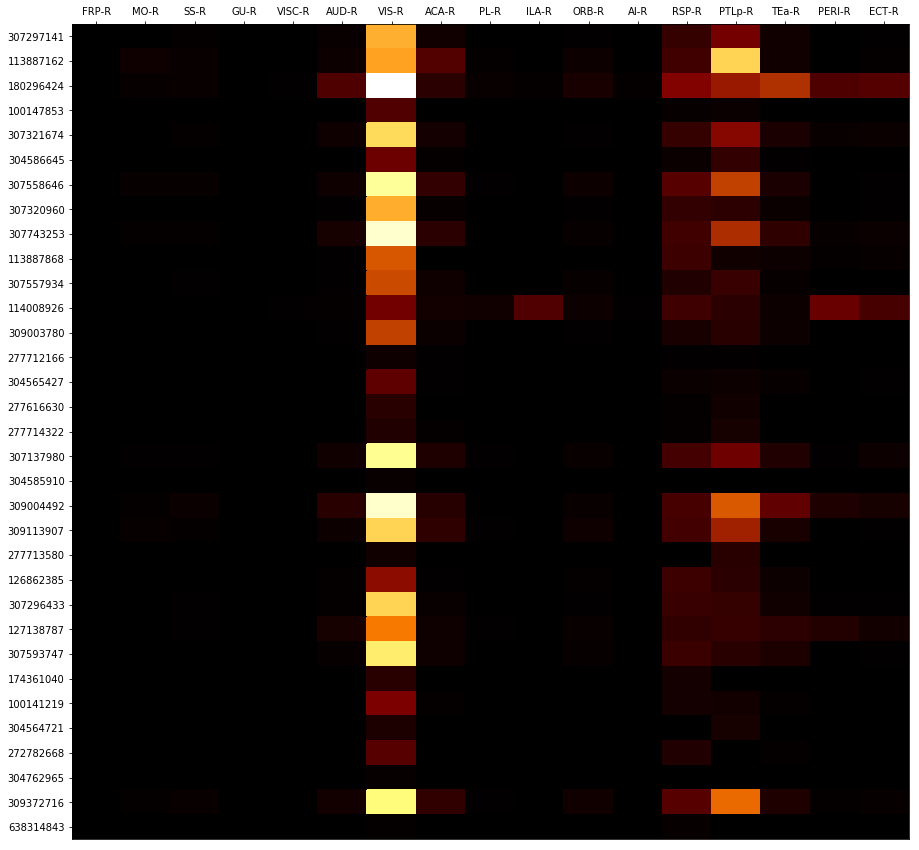

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

visp_experiment_ids = [ e['id'] for e in visp_experiments ]
ctx_children = structure_tree.child_ids( [isocortex['id']] )[0]

pm = mcc.get_projection_matrix(experiment_ids = visp_experiment_ids, 
                               projection_structure_ids = ctx_children,
                               hemisphere_ids= [2], # right hemisphere, ipsilateral
                               parameter = 'projection_density')

row_labels = pm['rows'] # these are just experiment ids
column_labels = [ c['label'] for c in pm['columns'] ] 
matrix = pm['matrix']

fig, ax = plt.subplots(figsize=(15,15))
heatmap = ax.pcolor(matrix, cmap=plt.cm.afmhot)

# put the major ticks at the middle of each cell
ax.set_xticks(np.arange(matrix.shape[1])+0.5, minor=False)
ax.set_yticks(np.arange(matrix.shape[0])+0.5, minor=False)

ax.set_xlim([0, matrix.shape[1]])
ax.set_ylim([0, matrix.shape[0]])          

# want a more natural, table-like display
ax.invert_yaxis()
ax.xaxis.tick_top()

ax.set_xticklabels(column_labels, minor=False)
ax.set_yticklabels(row_labels, minor=False)
plt.show()

## Manipulating Grid Data

The `MouseConnectivityCache` class also helps you download and open every experiment's projection grid data volume. By default it will download 25um volumes, but you could also download data at other resolutions if you prefer (10um, 50um, 100um).

This demonstrates how you can load the projection density for a particular experiment. It also shows how to download the template volume to which all grid data is registered. Voxels in that template have been structurally annotated by neuroanatomists and the resulting labels stored in a separate annotation volume image.

In [10]:
# we'll take this experiment - an injection into the primary somatosensory - as an example
experiment_id = 181599674

In [11]:
# projection density: number of projecting pixels / voxel volume
pd, pd_info = mcc.get_projection_density(experiment_id)

# injection density: number of projecting pixels in injection site / voxel volume
ind, ind_info = mcc.get_injection_density(experiment_id)

# injection fraction: number of pixels in injection site / voxel volume
inf, inf_info = mcc.get_injection_fraction(experiment_id)

# data mask:
# binary mask indicating which voxels contain valid data
dm, dm_info = mcc.get_data_mask(experiment_id)

template, template_info = mcc.get_template_volume()
annot, annot_info = mcc.get_annotation_volume()

# in addition to the annotation volume, you can get binary masks for individual structures
# in this case, we'll get one for the isocortex
cortex_mask, cm_info = mcc.get_structure_mask(315)

print(pd_info)
print(pd.shape, template.shape, annot.shape)

{'keyvaluepairs': {}, 'type': 'double', 'dimension': 3, 'space': 'left-posterior-superior', 'sizes': [528, 320, 456], 'space directions': [['25', '0', '0'], ['0', '25', '0'], ['0', '0', '25']], 'kinds': ['domain', 'domain', 'domain'], 'endian': 'little', 'encoding': 'gzip', 'space origin': ['0', '0', '0']}
(528, 320, 456) (528, 320, 456) (528, 320, 456)


Once you have these loaded, you can use matplotlib see what they look like.

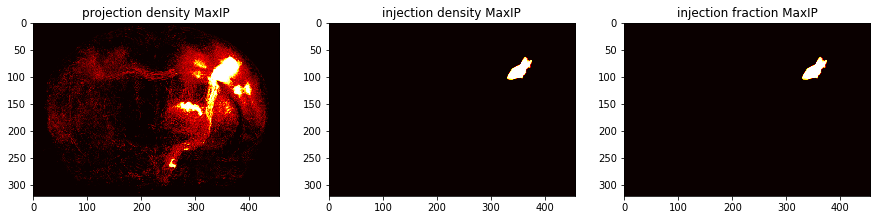

In [12]:
# compute the maximum intensity projection (along the anterior-posterior axis) of the projection data
pd_mip = pd.max(axis=0)
ind_mip = ind.max(axis=0)
inf_mip = inf.max(axis=0)

# show that slice of all volumes side-by-side
f, pr_axes = plt.subplots(1, 3, figsize=(15, 6))

pr_axes[0].imshow(pd_mip, cmap='hot', aspect='equal')
pr_axes[0].set_title("projection density MaxIP")

pr_axes[1].imshow(ind_mip, cmap='hot', aspect='equal')
pr_axes[1].set_title("injection density MaxIP")

pr_axes[2].imshow(inf_mip, cmap='hot', aspect='equal')
pr_axes[2].set_title("injection fraction MaxIP")

plt.show()

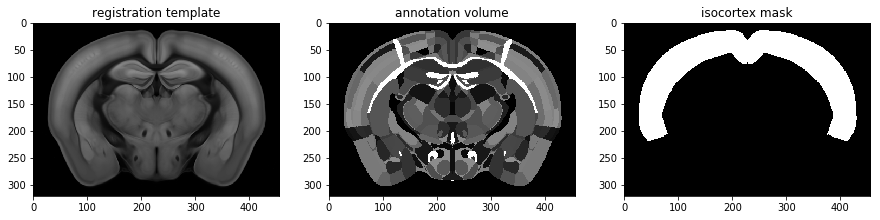

In [13]:
# Look at a slice from the average template and annotation volumes

# pick a slice to show
slice_idx = 264

f, ccf_axes = plt.subplots(1, 3, figsize=(15, 6))

ccf_axes[0].imshow(template[slice_idx,:,:], cmap='gray', aspect='equal', vmin=template.min(), vmax=template.max())
ccf_axes[0].set_title("registration template")

ccf_axes[1].imshow(annot[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=2000)
ccf_axes[1].set_title("annotation volume")

ccf_axes[2].imshow(cortex_mask[slice_idx,:,:], cmap='gray', aspect='equal', vmin=0, vmax=1)
ccf_axes[2].set_title("isocortex mask")

plt.show()

On occasion the TissueCyte microscope fails to acquire a tile. In this case the data from that tile should not be used for analysis. The data mask associated with each experiment can be used to determine which portions of the grid data came from correctly acquired tiles.

In this experiment, a missed tile can be seen in the data mask as a dark warped square. The values in the mask exist within [0, 1], describing the fraction of each voxel that was correctly acquired

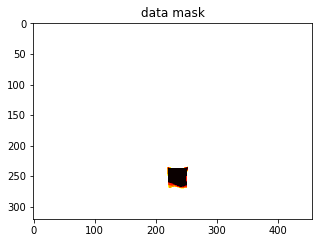

In [14]:
f, data_mask_axis = plt.subplots(figsize=(5, 6))

data_mask_axis.imshow(dm[81, :, :], cmap='hot', aspect='equal', vmin=0, vmax=1)
data_mask_axis.set_title('data mask')

plt.show()